In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv(r'C:\Users\vorob\Downloads\DataAnalystSQL\A_Btests\ab_test_data.csv')
data

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0
...,...,...,...,...
19993,6763ae9a-515c-473e-af00-0d9c4f6a5bc7,2023-07-06 03:27:37.041104,b,0
19994,ac5600f2-4d16-4503-b115-f1a96728b6d1,2023-07-03 04:20:48.572143,a,0
19995,5a8b2630-209b-4d83-b47f-0f3d9dd568a8,2023-07-23 16:23:49.211910,b,1
19996,b572d68b-26ac-432b-9f88-83e0fdee4ca1,2023-07-03 18:26:20.880675,b,0


In [83]:
#1.Кількість користувачів в групах A та B відповідно
data_a = data.loc[data['test_group'] == 'a']
usersa = data_a['test_group'].count()
print('Користувачів в групi A:', usersa)

Користувачів в групi A: 10013


In [84]:
#1.Кількість користувачів в групах A та B відповідно
data_b = data.loc[data['test_group'] == 'b']
usersb = data_b['test_group'].count()
print('Користувачів в групi B:', usersb)

Користувачів в групi B: 9985


In [43]:
#1.Кількість конверсій в групах A та B відповідно
amounta = data_a['conversion'].sum()
print('Кількість конверсій в групi A:', amounta)

Кількість конверсій в групi A: 611


In [44]:
#1.Кількість конверсій в групах A та B відповідно
amountb = data_b['conversion'].sum()
print('Кількість конверсій в групi B:', amountb)

Кількість конверсій в групi B: 889


In [54]:
#1.Рівень конверсії в групах A та B відповідно
conva = amounta / usersa * 100
print('Рівень конверсії в групi A:', conva.round(2),'%')

Рівень конверсії в групi A: 6.1 %


In [55]:
#1.Рівень конверсії в групах A та B відповідно
convb = amountb / usersb * 100
print('Рівень конверсії в групi B:', convb.round(2),'%')

Рівень конверсії в групi B: 8.9 %


In [82]:
#1.Дату початку та дату кінця тесту, а також тривалість тесту в днях
#Зміна типу даних на {datetime}
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date
#Дата початку тесту
mindate = data['timestamp'].min()
print('Дата початку тесту:', mindate)
#Дата кінця тесту
maxdate = data['timestamp'].max()
print('Дата кінця тесту:', maxdate)
#Tривалість тесту в днях
diff = (maxdate - mindate).days
print('Tривалість тесту в днях:', diff)

Дата початку тесту: 2023-07-03
Дата кінця тесту: 2023-07-25
Tривалість тесту в днях: 22


In [86]:
data.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

In [111]:
#Виведення a, b
a = list(data_a['conversion'])
b = list(data_b['conversion'])
all_users = list(a+b)
observed_difference = np.mean(b) - np.mean(a)

print(np.mean(b), np.mean(a), observed_difference)
#all_users

0.08903355032548824 0.06102067312493758 0.028012877200550658


In [108]:
#Перевірка, чи дані розподілені нормально
a_size = len(a)
permutations_number = 1_000
sample_means = []

for _ in range (permutations_number):
    sample = np.random.choice(all_users, a_size)
    sample_means.append(sample.mean())
    
len(sample_means)

1000

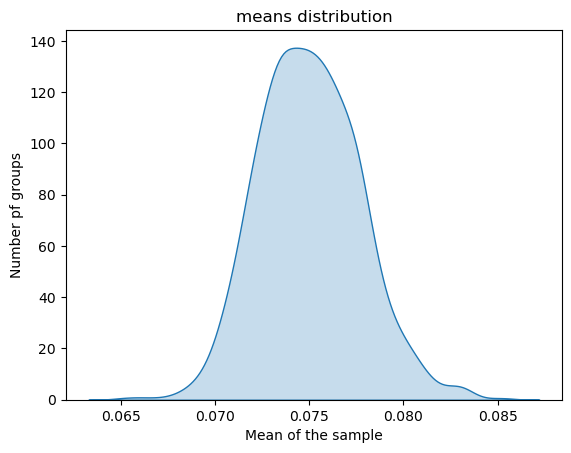

In [109]:
#Перевірка, чи дані розподілені нормально VISUALISATION
#-> we have a NORMAL distribution
density_plot = sns.kdeplot(
    sample_means,
    fill = True
)

density_plot.set(
xlabel = 'Mean of the sample',
ylabel = 'Number pf groups',
title ='means distribution')

plt.show()

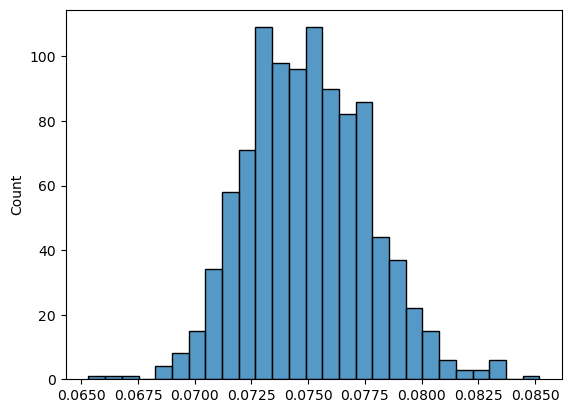

In [115]:
#VISUALISATION2 -> we have a NORMAL distribution
sns.histplot(sample_means)
plt.show()

In [118]:
#VISUALISATION 3 
a_size = len(a)
permutation_number = 1_000

sample_means_a = []
sample_means_b = []

for _ in range(permutation_number):
    sample_a = np.random.choice(all_users, a_size)
    sample_b = np.random.choice(all_users, a_size)
    
    sample_means_a.append(sample_a.mean())
    sample_means_b.append(sample_b.mean())

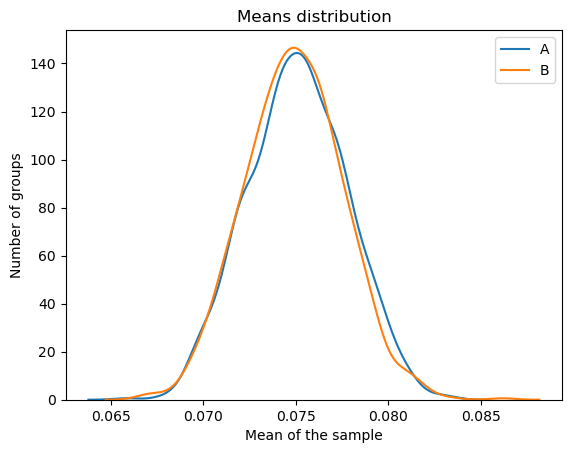

In [160]:
#VISUALISATION3 a & b -> we have a NORMAL distribution
density_plot  = sns.kdeplot(sample_means_a, label='A')
density_plot  = sns.kdeplot(sample_means_b, label='B')

density_plot.set(
xlabel = 'Mean of the sample',
ylabel = 'Number of groups',
title = 'Means distribution')
plt.legend()
plt.show()

In [123]:
#2.Обери статистичний критерій для тестування гіпотез 
#To compare the averages of two groups and determine whether the differences between them 
#I use "t-test method", as we have a NORMAL distribution
alpha = 0.05

statistic, pvalue = stats.ttest_ind(data[data['test_group'] == 'a' ] ['conversion'],
                                    data[data['test_group'] == 'b' ] ['conversion'],
                                    alternative = 'less'
                                   )

print(f't-statistic: {round(statistic,2)}, p-value:{round(pvalue,2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.(Used the "T-test" method as we have a normal distribution)')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.(Used the "T-test" method as we have a normal distribution)')

t-statistic: -7.53, p-value:0.0
The difference is statistically significant, Null Hypothesis is rejected.(Used the "T-test" method as we have a normal distribution)


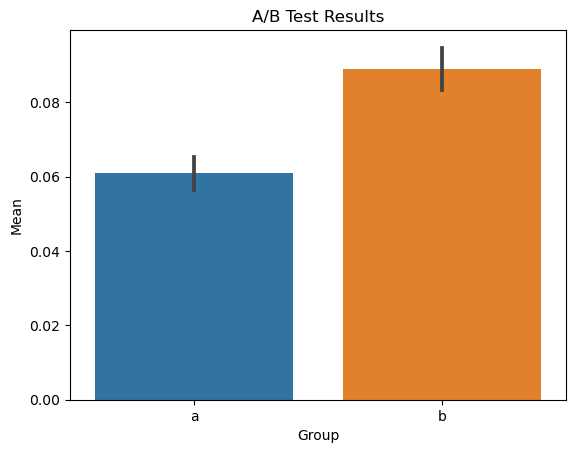

In [148]:
#Побудуй візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами
sns.barplot(x=data['test_group'],
            y=data['conversion'],
            errorbar = ('ci', 95))  # Confidence Intervals     
           
plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')
plt.show()

In [157]:
# Cортуємо дані, оскільки зараз вони упорядковані за значенням конверсії
# Cортування за датою та часом
data1 = data
data1['timestamp'] = sorted(data1['timestamp'])
data1

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-03 01:42:34.033708,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-03 01:46:14.688840,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-03 01:49:43.283638,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-03 01:49:54.067114,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-03 01:52:14.910970,b,0
...,...,...,...,...
19993,6763ae9a-515c-473e-af00-0d9c4f6a5bc7,2023-07-25 01:32:16.247402,b,0
19994,ac5600f2-4d16-4503-b115-f1a96728b6d1,2023-07-25 01:32:28.813474,a,0
19995,5a8b2630-209b-4d83-b47f-0f3d9dd568a8,2023-07-25 01:33:59.165132,b,1
19996,b572d68b-26ac-432b-9f88-83e0fdee4ca1,2023-07-25 01:35:59.130658,b,0


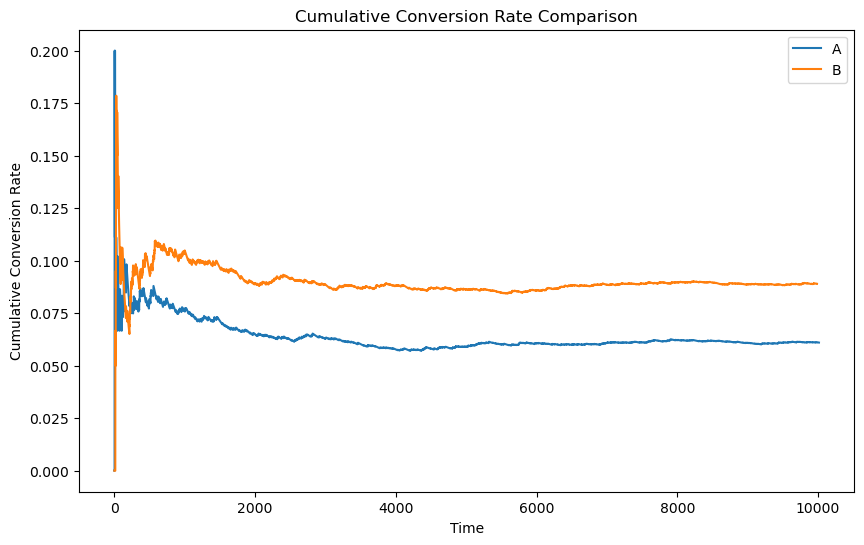

In [158]:
# Рахуємо кумулятивне середнє - це і є зміна конверсії з плином часу
cumulative_metric_a = data1[data1['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = data1[data1['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='A')
plt.plot(cumulative_metric_b, label='B')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.show()
